In [3]:
import pandas as pd
import random
import numpy as np

In [15]:
import pandas as pd
import random
import numpy as np

# Seed for reproducibility
random.seed(42)

# Define categories and health ratings distribution
categories = {
    "Fresh Produce": (3, 0),  # all healthy
    "Bakery": (2, 40),  # mixed ratings, some healthier
    "Deli": (1, 60),  # more unhealthy
    "Meat and Seafood": (1, 30),  # lower health rating
    "Dairy": (1, 20),  # 20% unhealthy
    "Frozen Foods": (1, 30),  # predominantly lower
    "Packaged Foods": (0, 20),  # predominantly unhealthy
    "Cereal and Breakfast Foods": (1, 35)  # more healthier options
}

# Product names for each category (10-12 products per category)
products = {
    "Fresh Produce": ['Apples', 'Bananas', 'Carrots', 'Lettuce', 'Tomatoes', 'Kale', 'Spinach', 'Broccoli', 'Cucumbers', 'Peppers'],
    "Bakery": ['Whole Wheat Bread', 'Sourdough Bread', 'Croissant', 'Muffin', 'Bagel', 'Baguette', 'Pretzel', 'Banana Bread', 'Cookies', 'Cinnamon Rolls'],
    "Deli": ['Turkey Sandwich', 'Chicken Wrap', 'Caesar Salad', 'Grilled Chicken', 'Veggie Sandwich', 'Ham Sandwich', 'Quiche', 'Tofu Salad', 'Sushi Roll', 'Pasta Salad'],
    "Meat and Seafood": ['Salmon Fillet', 'Chicken Breast', 'Pork Chops', 'Ground Beef', 'Shrimp', 'Tuna', 'Lamb Chops', 'Tilapia', 'Bacon', 'Crab Legs'],
    "Dairy": ['Whole Milk', 'Yogurt', 'Butter', 'Cheddar Cheese', 'Greek Yogurt', 'Cottage Cheese', 'Almond Milk', 'Soy Milk', 'Cream Cheese', 'Sour Cream'],
    "Frozen Foods": ['Frozen Pizza', 'Frozen Vegetables', 'Ice Cream', 'Frozen Burrito', 'Chicken Nuggets', 'Frozen Fish Sticks', 'Frozen Pancakes', 'Frozen Waffles', 'Frozen Pie', 'Frozen Fries'],
    "Packaged Foods": ['Chips', 'Soda', 'Candy', 'Instant Noodles', 'Energy Bars', 'Canned Soup', 'Cereal Bars', 'Potato Chips', 'Ramen Noodles', 'Canned Vegetables'],
    "Cereal and Breakfast Foods": ['Oatmeal', 'Granola', 'Corn Flakes', 'Pancake Mix', 'Waffles', 'Cereal', 'Granola Bars', 'Fruit Bars', 'Protein Bars', 'Muesli']
}

# Store regions
regions = ['East', 'West', 'North', 'South']

# Time period range (daily sales for a random period in 2024)
time_periods = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Generate 500 rows of data
data = []

# Generate data for each product, ensuring each product is only included once
for category, (base_health_rating, skew_prob) in categories.items():
    for product in products[category]:
        sales_volume = max(1, int(np.random.normal(50, 20)))  # Normal distribution for volume
        price = round(np.random.uniform(2.5, 15.0), 2)  # Price between 2.5 and 15.0
        sales_revenue = round(sales_volume * price, 2)
        region = random.choice(regions)
        date = random.choice(time_periods)

        # Assign health ratings based on the specific rules
        if category == "Fresh Produce":
            health_rating_value = 3  # All fresh produce are healthy
        elif category == "Dairy":
            health_rating_value = 0 if random.random() < 0.20 else 1  # 20% unhealthy
        elif category == "Deli":
            health_rating_value = random.choices([0, 1, 2], weights=[60, 30, 10])[0]  # More unhealthy options
        elif category == "Bakery":
            health_rating_value = random.choices([0, 1, 2], weights=[70, 20, 10])[0]  # More unhealthy products in Bakery
        else:
            health_rating_value = random.choices([0, 1, 2, 3], weights=[30, 30, 20, 20])[0]  # Other categories

        data.append({
            "Product ID": f"PROD_{random.randint(1, 1000)}",
            "Product Name": product,
            "Sales Volume": sales_volume,
            "Sales Revenue": sales_revenue,
            "Category": category,
            "Store Location/Region": region,
            "Time Period": date,
            "Health Rating": health_rating_value
        })

# Create the DataFrame
df = pd.DataFrame(data)

# Ensure unique products by removing duplicates based on 'Product Name'
df = df.drop_duplicates(subset=['Product Name'])

# Display the first few rows of the DataFrame and its shape
df.head(), df.shape


(  Product ID Product Name  Sales Volume  Sales Revenue       Category  \
 0   PROD_760       Apples            55         393.80  Fresh Produce   
 1   PROD_229      Bananas            37         261.22  Fresh Produce   
 2   PROD_693      Carrots            65         669.50  Fresh Produce   
 3   PROD_433      Lettuce            47         178.60  Fresh Produce   
 4    PROD_96     Tomatoes            25         373.25  Fresh Produce   
 
   Store Location/Region Time Period  Health Rating  
 0                  East  2024-01-13              3  
 1                 North  2024-05-05              3  
 2                  West  2024-02-22              3  
 3                  East  2024-10-29              3  
 4                  East  2024-01-16              3  ,
 (80, 8))

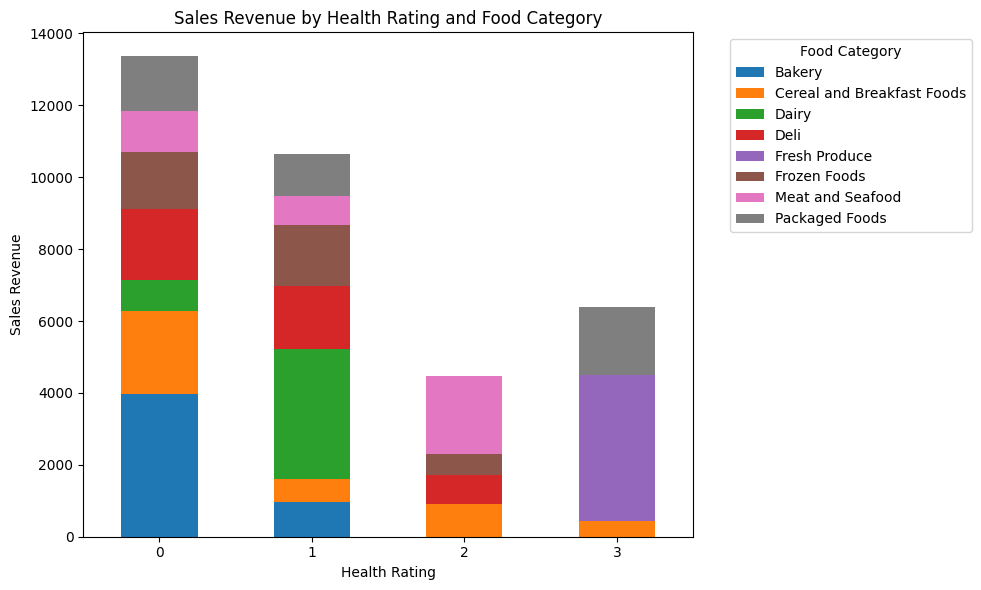

In [16]:
# Assuming df is the DataFrame containing your generated data
# Group the data by Health Rating and Category, summing the Sales Revenue
grouped_data = df.groupby(['Health Rating', 'Category'])['Sales Revenue'].sum().unstack(fill_value=0)

# Create a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Sales Revenue by Health Rating and Food Category')
plt.xlabel('Health Rating')
plt.ylabel('Sales Revenue')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

# Show the plot
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()
